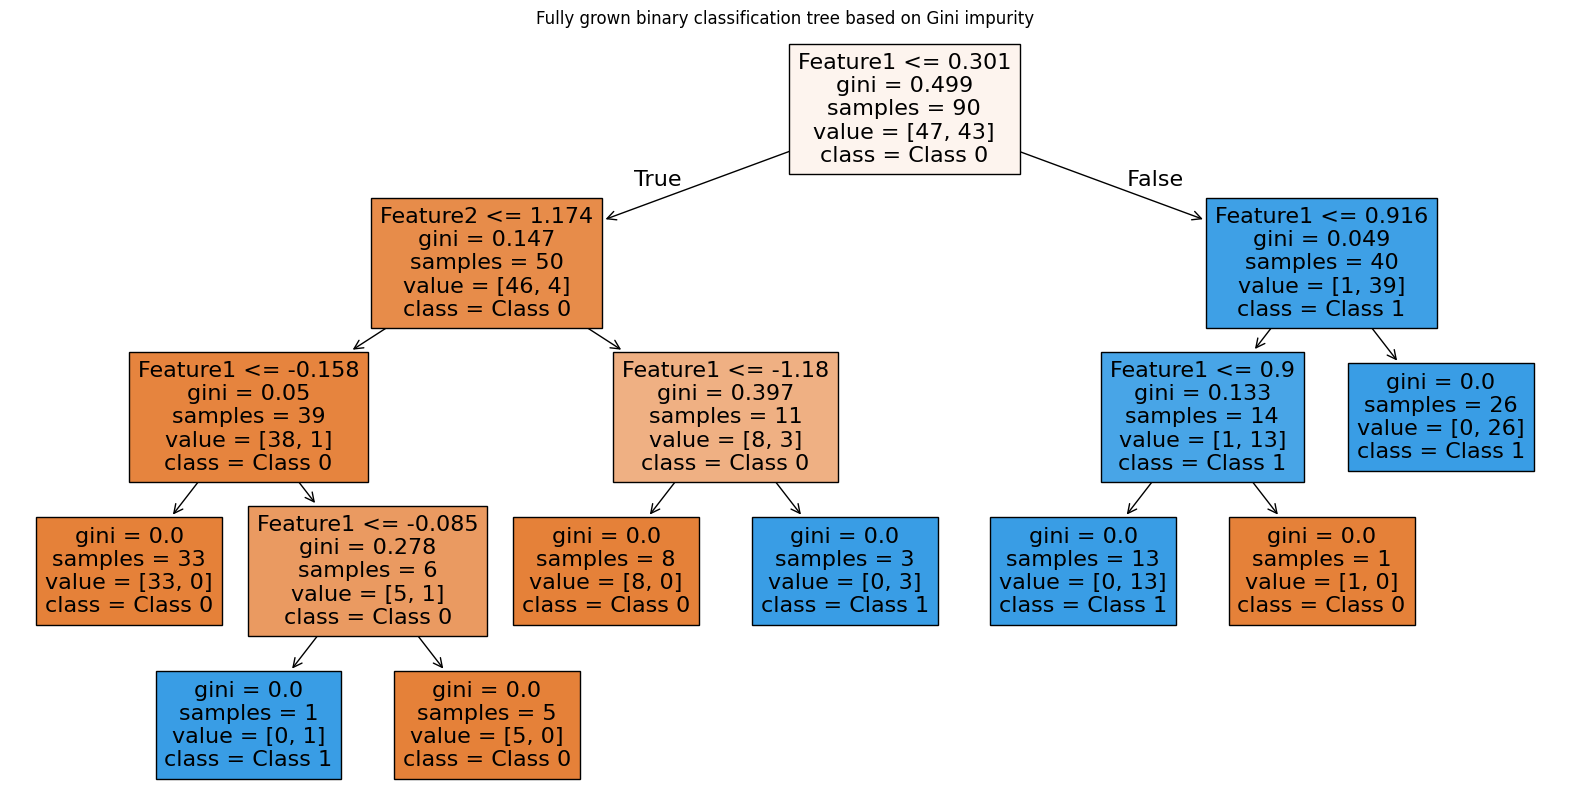

In [ ]:
#Q.1.a
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
df=pd.read_csv("https://hello.iitk.ac.in/manage/ee708sem32425/assignments/A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv")
x=df.drop("Label",axis=1)
y=df["Label"]
tree=DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1)
tree.fit(x,y)
plt.figure(figsize=(20,10))
plot_tree(tree,filled=True,feature_names=x.columns,class_names=['Class 0','Class 1'])
plt.title("Fully grown binary classification tree based on Gini impurity")
plt.show()

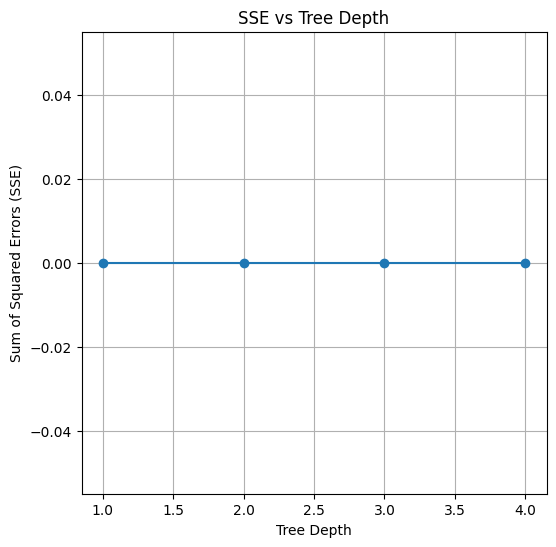

In [ ]:
#Q.1.b
tree_depth=tree.get_depth()
depths = list(range(1,tree_depth+1))
sse_list = []

for depth in depths:
   temp=DecisionTreeClassifier(criterion='gini',max_depth=depth,min_samples_split=2,min_samples_leaf=1)
   temp.fit(x,y)
   y_pred = clf.predict(x)
   sse =((y-y_pred)**2).sum()
   sse_list.append(sse)
plt.figure(figsize=(6, 6))
plt.plot(depths, sse_list, marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("SSE vs Tree Depth")
plt.grid(True)
plt.show()


In [ ]:
#Q.1.c
sse_changes = np.diff(sse_list)
sse_changes=np.abs(sse_changes)
min_change_depth=np.argmin(sse_changes)
print("The optimal pruning depth of the binary classification tree :",min_change_depth+2)

The optimal pruning depth of the binary classification tree : 2


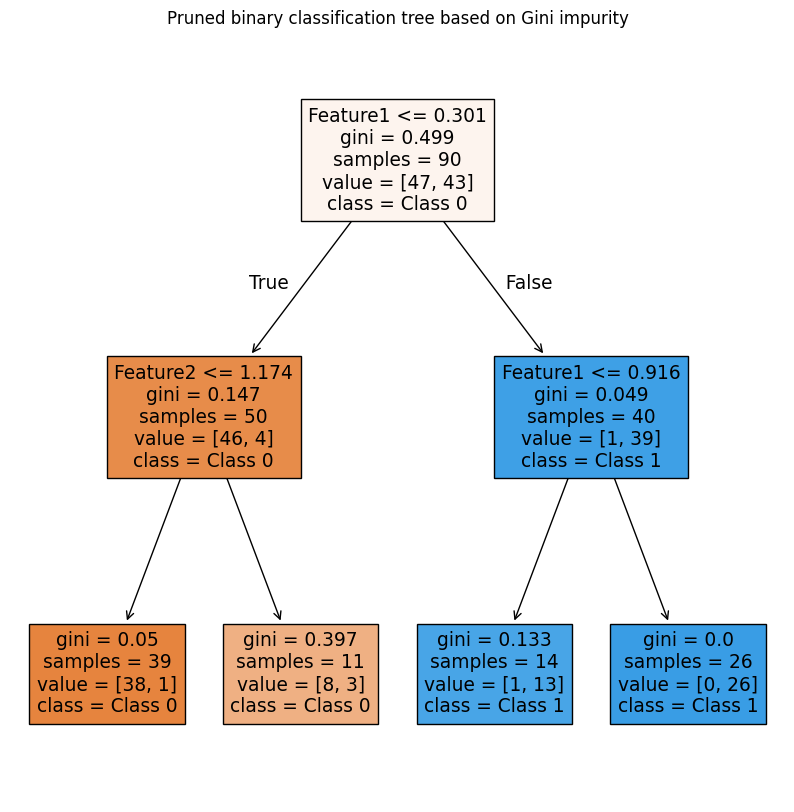

In [ ]:
#Q.1.d
tree_pruned=DecisionTreeClassifier(criterion='gini',max_depth=min_change_depth+2,min_samples_split=2,min_samples_leaf=1)
tree_pruned.fit(x,y)
plt.figure(figsize=(10,10))
plot_tree(tree_pruned,filled=True,feature_names=x.columns,class_names=['Class 0','Class 1'])
plt.title("Pruned binary classification tree based on Gini impurity")
plt.show()

In [ ]:
#Q.2
from sklearn.model_selection import train_test_split
import sklearn.linear_model
df=pd.read_csv("https://hello.iitk.ac.in/manage/ee708sem32425/assignments/A2_P2_ae609303-e3ee-4dc3-85f0-d40fdde4ae63.csv")
x=df.drop("Output",axis=1)
x=x.drop("Samples",axis=1)
y=df["Output"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
mse= sklearn.metrics.mean_squared_error(y_test,y_pred)
print("Mse of linear polynomial:",mse)

Mse of linear polynomial: 0.0957886492401823
